In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_json('https://api.covid19api.com/total/country/united-states')
data.info()
data.head()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Country      135 non-null    object             
 1   CountryCode  135 non-null    object             
 2   Province     135 non-null    object             
 3   City         135 non-null    object             
 4   CityCode     135 non-null    object             
 5   Lat          135 non-null    int64              
 6   Lon          135 non-null    int64              
 7   Confirmed    135 non-null    int64              
 8   Deaths       135 non-null    int64              
 9   Recovered    135 non-null    int64              
 10  Active       135 non-null    int64              
 11  Date         135 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(6), object(5)
memory usage: 12.8+ KB


,Lat,Lon,Confirmed,Deaths,Recovered,Active
count,135.0,135.0,1.350000e+02,135.000000,135.000000,1.350000e+02
mean,0.0,0.0,5.421238e+05,30825.414815,91660.748148,4.196376e+05
std,0.0,0.0,6.458994e+05,38562.610266,138614.542228,4.772734e+05
min,0.0,0.0,1.000000e+00,0.000000,0.000000,1.000000e+00
25%,0.0,0.0,5.100000e+01,0.000000,5.500000,4.550000e+01
50%,0.0,0.0,1.409090e+05,3420.000000,2665.000000,1.348240e+05
75%,0.0,0.0,1.118000e+06,65656.000000,169698.500000,8.826455e+05
max,0.0,0.0,1.872660e+06,108211.000000,485002.000000,1.279447e+06


In [2]:
data.drop('CountryCode', axis=1, inplace=True)
data.drop('Province', axis=1, inplace=True)
data.drop('City', axis=1, inplace=True)
data.drop('CityCode', axis=1,  inplace=True)
data.drop('Lat', axis=1, inplace=True)
data.drop('Lon', axis=1, inplace=True)
data.head(2)

,Country,Confirmed,Deaths,Recovered,Active,Date
0,United States of America,1,0,0,1,2020-01-22 00:00:00+00:00
1,United States of America,1,0,0,1,2020-01-23 00:00:00+00:00


In [3]:
data["Confirmed_diff"] = data.Confirmed - data.Confirmed.shift(1)
data["Deaths_diff"] = data.Deaths - data.Deaths.shift(1)
data["Recovered_diff"] = data.Recovered - data.Recovered.shift(1)
data["Active_diff"] = data.Active - data.Active.shift(1)
data['Deathrate'] = data.Deaths / data.Confirmed * 100
data['DateInt'] = (data.Date - data.Date[0]).astype("timedelta64[D]").astype("int32")
data.fillna(0, inplace=True)
data.head()

,Country,Confirmed,Deaths,Recovered,Active,Date,Confirmed_diff,Deaths_diff,Recovered_diff,Active_diff,Deathrate,DateInt
0,United States of America,1,0,0,1,2020-01-22 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0
1,United States of America,1,0,0,1,2020-01-23 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,1
2,United States of America,2,0,0,2,2020-01-24 00:00:00+00:00,1.0,0.0,0.0,1.0,0.0,2
3,United States of America,2,0,0,2,2020-01-25 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,3
4,United States of America,5,0,0,5,2020-01-26 00:00:00+00:00,3.0,0.0,0.0,3.0,0.0,4


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Country         135 non-null    object             
 1   Confirmed       135 non-null    int64              
 2   Deaths          135 non-null    int64              
 3   Recovered       135 non-null    int64              
 4   Active          135 non-null    int64              
 5   Date            135 non-null    datetime64[ns, UTC]
 6   Confirmed_diff  135 non-null    float64            
 7   Deaths_diff     135 non-null    float64            
 8   Recovered_diff  135 non-null    float64            
 9   Active_diff     135 non-null    float64            
 10  Deathrate       135 non-null    float64            
 11  DateInt         135 non-null    int32              
dtypes: datetime64[ns, UTC](1), float64(5), int32(1), int64(4), object(1)
memory usage: 12.3+ KB


,Confirmed,Deaths,Recovered,Active,Confirmed_diff,Deaths_diff,Recovered_diff,Active_diff,Deathrate,DateInt
count,1.350000e+02,135.000000,135.000000,1.350000e+02,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,5.421238e+05,30825.414815,91660.748148,4.196376e+05,13871.548148,801.562963,3592.607407,9477.377778,3.314510,67.000000
std,6.458994e+05,38562.610266,138614.542228,4.772734e+05,12851.823342,860.285961,6848.804499,10828.329568,2.494855,39.115214
min,1.000000e+00,0.000000,0.000000,1.000000e+00,0.000000,0.000000,-2446.000000,-29204.000000,0.000000,0.000000
25%,5.100000e+01,0.000000,5.500000,4.550000e+01,2.500000,0.000000,0.000000,1.000000,0.000000,33.500000
50%,1.409090e+05,3420.000000,2665.000000,1.348240e+05,18611.000000,539.000000,203.000000,6205.000000,3.773585,67.000000
75%,1.118000e+06,65656.000000,169698.500000,8.826455e+05,25403.500000,1518.500000,4641.000000,19320.500000,5.841761,100.500000
max,1.872660e+06,108211.000000,485002.000000,1.279447e+06,36188.000000,2612.000000,51717.000000,30290.000000,7.382550,134.000000


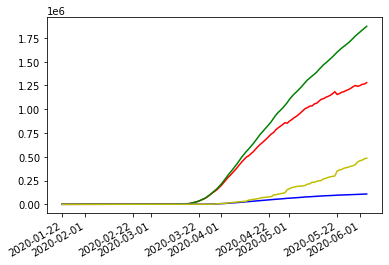

In [5]:
fig, ax = plt.subplots()
ax.plot(data['Date'], data['Active'], 'r' , data['Date'], data['Confirmed'], 'g', data['Date'], data['Deaths'], 'b', data['Date'], data['Recovered'], 'y')
fig.autofmt_xdate()

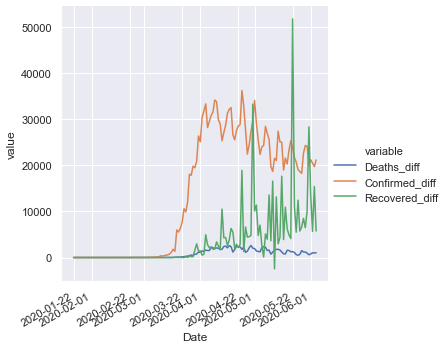

In [6]:
sns.set()
g = sns.relplot(x="Date",
                y="value",
                data=pd.melt(data[["Date", "Deaths_diff", "Confirmed_diff", "Recovered_diff"]], "Date"),
                hue="variable",
                kind="line")
g.fig.autofmt_xdate()

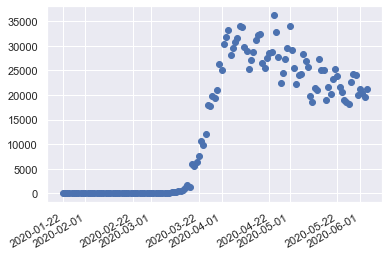

In [7]:
fig, ax = plt.subplots()
ax.plot_date(data.Date, data.Confirmed_diff)
fig.autofmt_xdate()

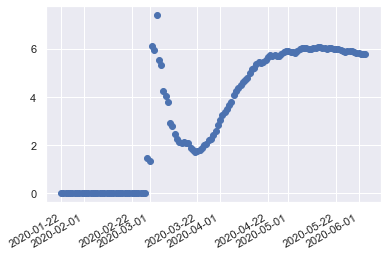

In [8]:
fig, ax = plt.subplots()
ax.plot_date(data.Date, data.Deathrate)
fig.autofmt_xdate()

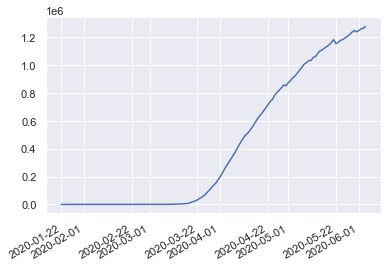

In [9]:
fig, ax = plt.subplots()
ax.plot(data.Date, data.Active)
fig.autofmt_xdate()

Best parameter (CV score=-34668.800):
{'svr__C': 1.2, 'svr__epsilon': 0.9, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
-9.40353193652797


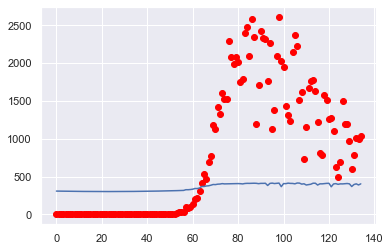

In [10]:
from svr_covid import predict_svr
X = data.iloc[:, [11,6,8]]
Y = data.iloc[:, [7]]
y_pred = predict_svr(X, Y)
fig, ax = plt.subplots()
ax.scatter(X.DateInt, Y, c="red")
ax.plot(X.DateInt, y_pred)

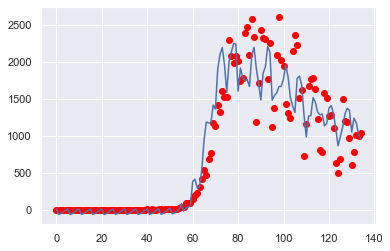

In [11]:
from lstm_covid import predict_lstm
X = data.iloc[0:135, [6,8]]
Y = data.iloc[0:135, [7]]
y_pred = predict_lstm(X, Y)
fig, ax = plt.subplots()
ax.scatter(X.index, Y, c="red")
ax.plot(X.index, y_pred.reshape((-1)))
#ax.set_ylim(0,300)

Wider: -779525.76 (997121.57) MSE


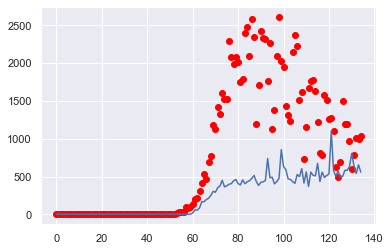

In [12]:
from mlp_covid import predict_mlp
X = data.iloc[:, [11,6,8]]
Y = data.iloc[:, [7]]
fig, ax = plt.subplots()
ax.scatter(X.index, Y, c="red")
ax.plot(X.index, predict_mlp(X, Y))
#ax.set_ylim(0,300)